<a href="https://colab.research.google.com/github/sherri-ice/DataAnalyseProject/blob/zodiac_signs/vkiad_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
uri_to_data_frame = "https://raw.githubusercontent.com/sherri-ice/DataAnalyseProject/main/dataframe.csv"
data_frame =  pd.read_csv(uri_to_data_frame)
data_frame

,Отметка времени,Ваш пол,Ваш факультет,Ваш средний балл,"Сколько времени в среднем в день Вы уделяете учебе (домашние работы, лабораторные)",Ваш знак зодиака,Как часто Вы пьёте алкоголь?,Как часто Вы курите (сигареты/вейп/кальян)?,Как часто Вы пьёте кофе/энергетики?,Работаете ли Вы на данный момент?,Как часто Вы посещаете пары?,Сколько Вы спите в будний день?,Были ли у Вас серьёзные мысли об отчислении?,"Были ли у Вас мысли о суициде, была ли депрессия?",Болели ли Вы Covid-19?,Как часто Вы ходите в библиотеку?,Кем Вы себя считаете?,Состоите ли Вы в Студенческом союзе или похожих организациях?,Есть ли у Вас хобби вне университета?,Есть ли у Вас отношения?,Занимаетесь ли Вы спортом?,Вы учитесь на платной или бесплатной основе?,Количество пересдач за всё время обучения,Вы натуральный блондин
0,2021/11/26 12:21:04 PM GMT+3,Предпочитаю не говорить (подаюсь в гугл),ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Рыбы,Не пью,Не курю,Не пью,Нет,Пропускаю <25% пар в неделю,7-8 часов в сутки,Да,Нет,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Нет,Да,Да,"Да, но только на физре","Бесплатно, потерял стипендию",1-5 пересдач,Нет(
1,2021/11/26 12:21:41 PM GMT+3,Предпочитаю не говорить (подаюсь в гугл),ФПМИ,5.1 - 7.0,Максимум 2 часа,Дева,Раз в месяц,Не курю,Пью почти каждый день,Нет,Пропускаю <25% пар в неделю,4-6 часов в сутки,Да,Да,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Нет,Да,Да,"Да, но только на физре",Платно,1-5 пересдач,Нет(
2,2021/11/26 12:21:57 PM GMT+3,Мужской,ФПМИ,7.1 - 8.0,"Могу посидеть и 3, и 4",Козерог,Не пью,Не курю,"Пью реже, чем раз в две недели","Да, по специальности",Хожу на все пары,7-8 часов в сутки,Нет,Нет,"Нет, не болел",Не хожу в библиотеку,Интроверт,Нет,Да,Нет,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
3,2021/11/26 12:22:31 PM GMT+3,Женский,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Весы,Раз в месяц,Не курю,Пью 1-3 раза в неделю,Нет,Хожу на все пары,7-8 часов в сутки,Да,Да,"Нет, не болел","Редко, 1-2 раза в месяц",Амбиверт,Нет,Да,Нет,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),"Да, на всю страну такой один"
4,2021/11/26 12:22:53 PM GMT+3,Мужской,ФПМИ,8.1 - 9.0,Ботаю ол дэй лонг,Овен,Раз в неделю,"Реже, чем раз в день","Пью реже, чем раз в две недели","Да, по специальности",Пропускаю >70% пар в неделю,7-8 часов в сутки,Нет,Нет,"Нет, не болел",Не хожу в библиотеку,Экстраверт,Нет,Да,Да,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2021/12/05 12:48:57 AM GMT+3,Мужской,ММФ,7.1 - 8.0,Ботаю ол дэй лонг,Лев,Раз в месяц,"Больше, чем 3 раза в день","Пью реже, чем раз в две недели",Нет,Пропускаю <50% пар в неделю,4-6 часов в сутки,Да,Да,"Да, во время студенчества",Не хожу в библиотеку,Экстраверт,Да,Да,Да,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
230,2021/12/05 1:45:07 PM GMT+3,Женский,ММФ,7.1 - 8.0,"Могу посидеть и 3, и 4",Овен,Не пью,"Больше, чем 3 раза в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <25% пар в неделю,4-6 часов в сутки,Нет,Да,"Да, до поступления",Не хожу в библиотеку,Амбиверт,Нет,Да,Да,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
231,2021/12/05 8:54:15 PM GMT+3,Женский,ММФ,8.1 - 9.0,Максимум 2 часа,Скорпион,Раз в месяц,Не курю,Пью почти каждый день,"Да, не по специальности",Хожу на все пары,7-8 часов в сутки,Да,Да,"Нет, не болел",Не хожу в библиотеку,Амбиверт,Нет,Да,Нет,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
232,2021/12/06 3:36:11 AM GMT+3,Мужской,ММФ,5.1 - 7.0,Максимум 2 часа,Козерог,Раз в неделю,"Реже, чем раз в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <50% пар в неделю,4-6 часов в сутки,Да,Нет,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Да,Да,Да,Нет,"Бесплатно, потерял стипендию",Больше 5 пересдач,Нет(


#Чистим датасет

Переименуем колонки для более компактного кода

In [71]:
data_frame.rename(columns = {'Отметка времени':'time', \
                             'Ваш пол':'gender', \
                             'Ваш факультет': 'faculty',\
                             'Ваш средний балл': 'average_grade',
                             'Сколько времени в среднем в день Вы уделяете учебе (домашние работы, лабораторные)':'study_time',\
                             'Ваш знак зодиака': 'zodiac_sign',\
                             'Как часто Вы пьёте алкоголь?': 'alcohol',\
                             'Как часто Вы курите (сигареты/вейп/кальян)?': 'smoke',\
                             'Как часто Вы пьёте кофе/энергетики?': 'coffee',\
                             'Работаете ли Вы на данный момент?': 'work', \
                             'Как часто Вы посещаете пары?': 'attendance', \
                             'Сколько Вы спите в будний день?': 'sleep',\
                             'Были ли у Вас серьёзные мысли об отчислении?':'expulsion', \
                             'Были ли у Вас мысли о суициде, была ли депрессия?': 'depression',
                             'Болели ли Вы Covid-19?': 'covid19',
                             'Как часто Вы ходите в библиотеку?': 'library_attendance',\
                             'Кем Вы себя считаете?': 'person_type', \
                             'Состоите ли Вы в Студенческом союзе или похожих организациях?': 'student_union', \
                             'Есть ли у Вас хобби вне университета?': 'hobby',\
                             'Есть ли у Вас отношения?': 'relationship',\
                             'Занимаетесь ли Вы спортом?': 'sport',\
                             'Вы учитесь на платной или бесплатной основе?': 'education_type', \
                             'Количество пересдач за всё время обучения': 'failed_exams',
                             'Вы натуральный блондин': 'blond'},\
                             inplace=True)


Удалим столбец с временем заполнения формы, он нас не интересует:

In [72]:
data_frame = data_frame.drop('time', axis = 1)

KeyError: ignored

В некотрых столбцах заменим данные типа Да/Нет на True/False. Помимо этого для столбца `covid19` в опросе уточнялось, когда именно вы болели: до поступления или во время вашего студенчества. Мы решаем, что нам важнее просто информация о том, болел ли человек, поэтому заменяем оба этих варианта на True.

In [ ]:
data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 'blond']] = data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 
                                                                                                        'blond']].replace(['Да, во время студенчества', 'Да, до поступления', 'Да', 
                                                                                                                           'Да, на всю страну такой один'], True)
data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 'blond']] = data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 
                                                                                                        'blond']].replace(['Нет, не болел', 'Нет', 'Нет('], False)

В колонке `gender` помимо вариантов ответа "мужской", "женский", мы получили несколько неопределенных вариантов, которые для нас равносильны `Nan`. Просто выкинуть их из датасета мы не можем, так как нам важна остальная информация в этих строчках.

In [ ]:
data_frame.gender

Так как корректных данных в колонке гораздо больше, мы решили невалидные данные заменить в том же процентном отношении, в котором сейчас находятся ответы Мужской / Женский.

In [ ]:
data_frame['gender'].replace(['Мужской'], 'm', inplace = True)
data_frame['gender'].replace(['Женский'], 'f', inplace = True)
gender = data_frame.loc[:, 'gender']
gender = DataFrame(gender.value_counts())

num_of_men = gender.loc['m']
num_of_women = gender.loc['f']
percent_of_men = num_of_men / (num_of_women + num_of_men)
num_of_men = int(gender.loc['Предпочитаю не говорить (подаюсь в гугл)'] * percent_of_men) 
num_of_women = int(gender.loc['Предпочитаю не говорить (подаюсь в гугл)'] - num_of_men)

In [ ]:
data_frame.gender.replace(['Предпочитаю не говорить (подаюсь в гугл)'], np.nan, inplace = True)
print('Уникальные поля до замены ', data_frame.gender.unique())
data_frame.gender.fillna('m', limit = num_of_men, inplace = True)
print('Уникальные поля после замены части Nan-ов ', data_frame.gender.unique())
data_frame.gender.fillna('f', limit = num_of_women, inplace = True)
print('Уникальные поля после замены всех некорректных данных ', data_frame.gender.unique())

Рассмотри колонку `faculty`. Из графика видно, что получилось неоднородная выборка по факультетам университета. Поэтому в дальнейшем учитывать принадлежность к факультету мы не будем.

In [ ]:
plt.figure(figsize=(16, 5))
unique_faculty = data_frame.faculty.value_counts()
plt.xticks(np.arange(unique_faculty.index.size), unique_faculty.index)
plt.bar(range(data_frame.faculty.unique().size), data_frame.faculty.value_counts())

In [73]:
data_frame

,gender,faculty,average_grade,study_time,zodiac_sign,alcohol,smoke,coffee,work,attendance,sleep,expulsion,depression,covid19,library_attendance,person_type,student_union,hobby,relationship,sport,education_type,failed_exams,blond
0,m,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Рыбы,Не пью,Не курю,Не пью,Нет,Пропускаю <25% пар в неделю,7-8 часов в сутки,True,False,True,Не хожу в библиотеку,Интроверт,False,True,True,"Да, но только на физре","Бесплатно, потерял стипендию",1-5 пересдач,False
1,m,ФПМИ,5.1 - 7.0,Максимум 2 часа,Дева,Раз в месяц,Не курю,Пью почти каждый день,Нет,Пропускаю <25% пар в неделю,4-6 часов в сутки,True,True,True,Не хожу в библиотеку,Интроверт,False,True,True,"Да, но только на физре",Платно,1-5 пересдач,False
2,m,ФПМИ,7.1 - 8.0,"Могу посидеть и 3, и 4",Козерог,Не пью,Не курю,"Пью реже, чем раз в две недели","Да, по специальности",Хожу на все пары,7-8 часов в сутки,False,False,False,Не хожу в библиотеку,Интроверт,False,True,False,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
3,f,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Весы,Раз в месяц,Не курю,Пью 1-3 раза в неделю,Нет,Хожу на все пары,7-8 часов в сутки,True,True,False,"Редко, 1-2 раза в месяц",Амбиверт,False,True,False,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),True
4,m,ФПМИ,8.1 - 9.0,Ботаю ол дэй лонг,Овен,Раз в неделю,"Реже, чем раз в день","Пью реже, чем раз в две недели","Да, по специальности",Пропускаю >70% пар в неделю,7-8 часов в сутки,False,False,False,Не хожу в библиотеку,Экстраверт,False,True,True,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,m,ММФ,7.1 - 8.0,Ботаю ол дэй лонг,Лев,Раз в месяц,"Больше, чем 3 раза в день","Пью реже, чем раз в две недели",Нет,Пропускаю <50% пар в неделю,4-6 часов в сутки,True,True,True,Не хожу в библиотеку,Экстраверт,True,True,True,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),False
230,f,ММФ,7.1 - 8.0,"Могу посидеть и 3, и 4",Овен,Не пью,"Больше, чем 3 раза в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <25% пар в неделю,4-6 часов в сутки,False,True,True,Не хожу в библиотеку,Амбиверт,False,True,True,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
231,f,ММФ,8.1 - 9.0,Максимум 2 часа,Скорпион,Раз в месяц,Не курю,Пью почти каждый день,"Да, не по специальности",Хожу на все пары,7-8 часов в сутки,True,True,False,Не хожу в библиотеку,Амбиверт,False,True,False,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),False
232,m,ММФ,5.1 - 7.0,Максимум 2 часа,Козерог,Раз в неделю,"Реже, чем раз в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <50% пар в неделю,4-6 часов в сутки,True,False,True,Не хожу в библиотеку,Интроверт,True,True,True,Нет,"Бесплатно, потерял стипендию",Больше 5 пересдач,False


#Анализ знаков зодиака

Для начала посмотрим на распределние знаков зодиака студентов:

In [12]:
zodiac_signs = data_frame.zodiac_sign.value_counts()
zodiac_signs = zodiac_signs[['Овен', 'Телец', 'Близнецы',
                             'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]
zodiac_signs

Овен        19
Телец       11
Близнецы    14
Рак         14
Лев         29
Дева        24
Весы        26
Скорпион    27
Стрелец     17
Козерог     31
Водолей     11
Рыбы        11
Name: zodiac_sign, dtype: int64

<BarContainer object of 12 artists>

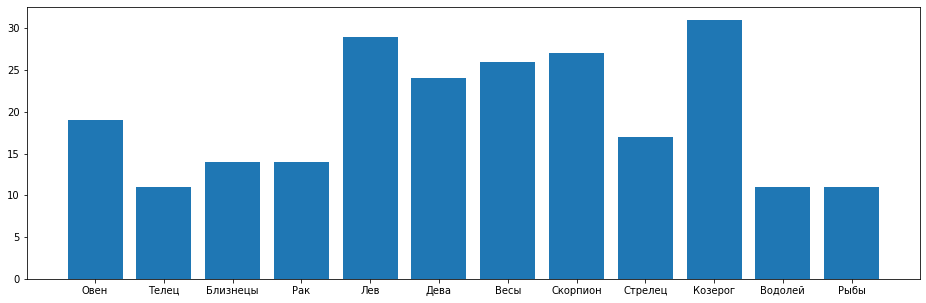

In [13]:
plt.figure(figsize=(16, 5))
plt.xticks(np.arange(zodiac_signs.index.size), zodiac_signs.index)
plt.bar(range(data_frame.zodiac_sign.unique().size), zodiac_signs)

Чаще всего встречаются Львы и Козероги, а вот меньше всего - Водолеи, Рыбы и Тельцы.



---



А теперь узнаем кто же лучше всех учится!

In [17]:
grouped_data = data_frame.groupby(by = ['zodiac_sign'])['average_grade'].value_counts()
zodiac_sign_mean = {}
for i in grouped_data.index:
  zodiac_sign_mean[i[0]] = zodiac_sign_mean.get(i[0], 0) + (float(i[1].split(' - ')[0]) + float(i[1].split(' - ')[1]))/2 * grouped_data[i]
for zodiac_sign in zodiac_sign_mean:
  zodiac_sign_mean[zodiac_sign] /= zodiac_signs[zodiac_sign]
zodiac_sign_mean = pd.Series(zodiac_sign_mean)
zodiac_sign_mean = zodiac_sign_mean[['Овен', 'Телец', 'Близнецы',
                              'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]

<BarContainer object of 12 artists>

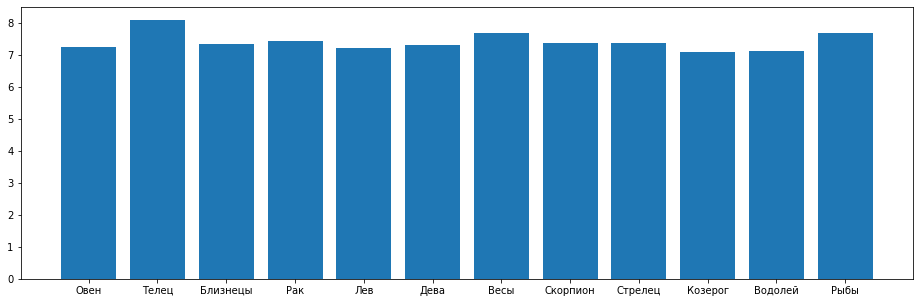

In [23]:
plt.figure(figsize=(16, 5))
plt.xticks(np.arange(zodiac_sign_mean.index.size), zodiac_sign_mean.index)
plt.bar(range(data_frame.zodiac_sign.unique().size), zodiac_sign_mean)  

Как видно, особо никто не выделяется :)

---



Какой из знаков зодиака меньше всего курит?

Посмотрим, какой из знаков зодиака имеет больший процент курящих:

In [45]:
grouped_data = data_frame.groupby(by = ['zodiac_sign']).apply(lambda x: x['smoke'].value_counts(normalize = True)['Не курю'])
grouped_data = grouped_data[['Овен', 'Телец', 'Близнецы',
                              'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]
print(grouped_data)

zodiac_sign
Овен        0.526316
Телец       0.636364
Близнецы    0.714286
Рак         0.857143
Лев         0.655172
Дева        0.666667
Весы        0.615385
Скорпион    0.666667
Стрелец     0.647059
Козерог     0.645161
Водолей     0.545455
Рыбы        0.545455
dtype: float64


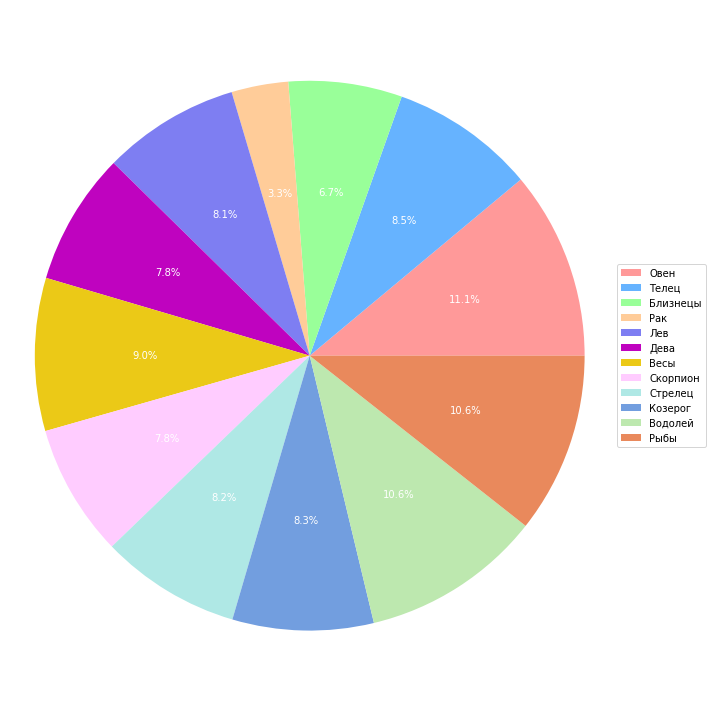

In [69]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
def func(pct):
    absolute = int(np.round(pct*100))
    return "{:.1f}%".format(pct, absolute)

labels = ['Овен', 'Телец', 'Близнецы', 'Рак', 'Лев', 'Дева',
          'Весы', 'Скорпион', 'Стрелец', 'Козерог', 'Водолей', 'Рыбы']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',
          '#7e7ef2', '#bf03bf', '#ebc917', '#ffccff',
          '#afe8e5', '#729edf', '#bde8af', '#e9895c']
wedges, texts, autotexts = ax.pie(1 - grouped_data.values, colors = colors, autopct = lambda pct: func(pct),
                                  textprops=dict(color="w"))


plt.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

Как видно, от знака зодиака не зависит (внезапно) желание курить.
Тем не менее, самым курящим знаком оказался Овен, а вот не курящим - Рак. (потому что зачем им ещё один?)

Теперь посмотрим на статистику употребления алкоголя:

In [74]:
grouped_data = data_frame.groupby(by = ['zodiac_sign']).apply(lambda x: x['alcohol'].value_counts(normalize = True)['Не пью'])
grouped_data = grouped_data[['Овен', 'Телец', 'Близнецы',
                              'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]
print(grouped_data)

zodiac_sign
Овен        0.315789
Телец       0.363636
Близнецы    0.357143
Рак         0.500000
Лев         0.379310
Дева        0.375000
Весы        0.346154
Скорпион    0.370370
Стрелец     0.352941
Козерог     0.387097
Водолей     0.181818
Рыбы        0.181818
dtype: float64


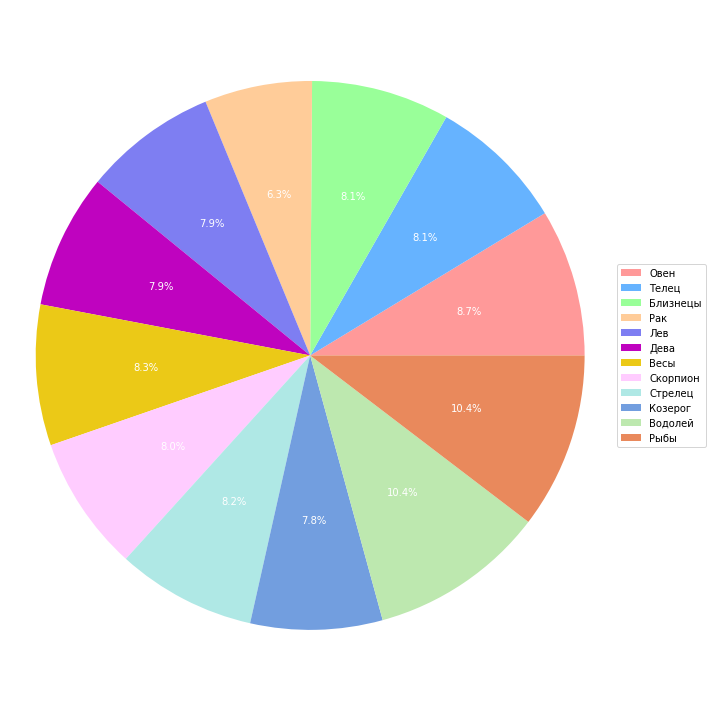

In [75]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
def func(pct):
    absolute = int(np.round(pct*100))
    return "{:.1f}%".format(pct, absolute)

labels = ['Овен', 'Телец', 'Близнецы', 'Рак', 'Лев', 'Дева',
          'Весы', 'Скорпион', 'Стрелец', 'Козерог', 'Водолей', 'Рыбы']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',
          '#7e7ef2', '#bf03bf', '#ebc917', '#ffccff',
          '#afe8e5', '#729edf', '#bde8af', '#e9895c']
wedges, texts, autotexts = ax.pie(1 - grouped_data.values, colors = colors, autopct = lambda pct: func(pct),
                                  textprops=dict(color="w"))


plt.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

И первое место разделили Водолеи и Рыбы. А вот Раки продолжают придерживаться здорового образа жизни :)

Рассмотрим теперь психическое состояние знаков зодиака.
Какой знак зодиака чаще всего сталкивался с депрессией?

In [82]:
grouped_data = data_frame.groupby(by = ['zodiac_sign']).apply(lambda x: x['depression'].value_counts(normalize = True)[True])
grouped_data = grouped_data[['Овен', 'Телец', 'Близнецы',
                              'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]
print(grouped_data)

zodiac_sign
Овен        0.368421
Телец       0.363636
Близнецы    0.214286
Рак         0.142857
Лев         0.413793
Дева        0.500000
Весы        0.384615
Скорпион    0.444444
Стрелец     0.352941
Козерог     0.290323
Водолей     0.454545
Рыбы        0.363636
dtype: float64


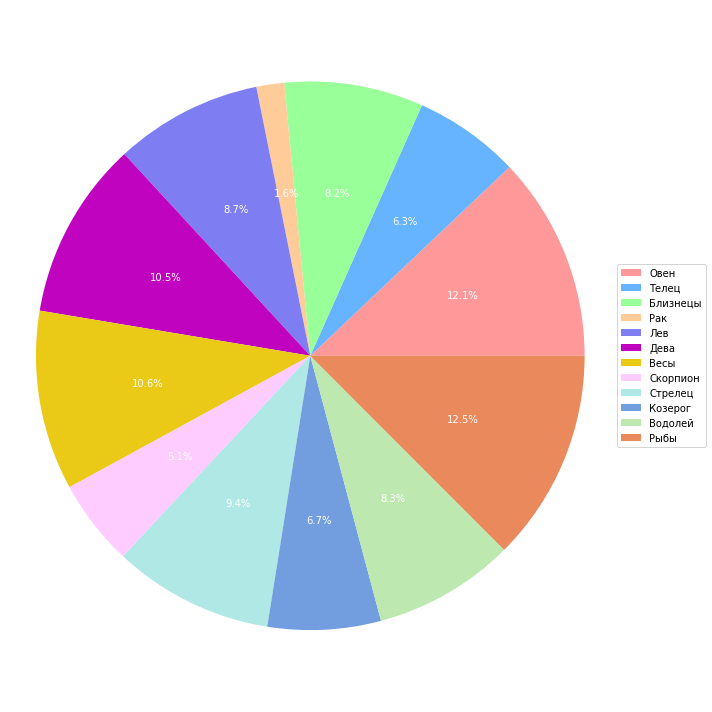

In [87]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
def func(pct):
    absolute = int(np.round(pct*100))
    return "{:.1f}%".format(pct, absolute)

labels = ['Овен', 'Телец', 'Близнецы', 'Рак', 'Лев', 'Дева',
          'Весы', 'Скорпион', 'Стрелец', 'Козерог', 'Водолей', 'Рыбы']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',
          '#7e7ef2', '#bf03bf', '#ebc917', '#ffccff',
          '#afe8e5', '#729edf', '#bde8af', '#e9895c']
wedges, texts, autotexts = ax.pie(grouped_data.values, colors = colors, autopct = lambda pct: func(pct),
                                  textprops=dict(color="w"))


plt.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

Овны и Рыбы...
Будем надеятся, что у них всё будет хорошо.

И наконец самое интересное: какой знак зодиака самый любимый?


In [84]:
grouped_data = data_frame.groupby(by = ['zodiac_sign']).apply(lambda x: x['relationship'].value_counts(normalize = True)[True])
grouped_data = grouped_data[['Овен', 'Телец', 'Близнецы',
                              'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]
print(grouped_data)

zodiac_sign
Овен        0.526316
Телец       0.272727
Близнецы    0.357143
Рак         0.071429
Лев         0.379310
Дева        0.458333
Весы        0.461538
Скорпион    0.222222
Стрелец     0.411765
Козерог     0.290323
Водолей     0.363636
Рыбы        0.545455
dtype: float64


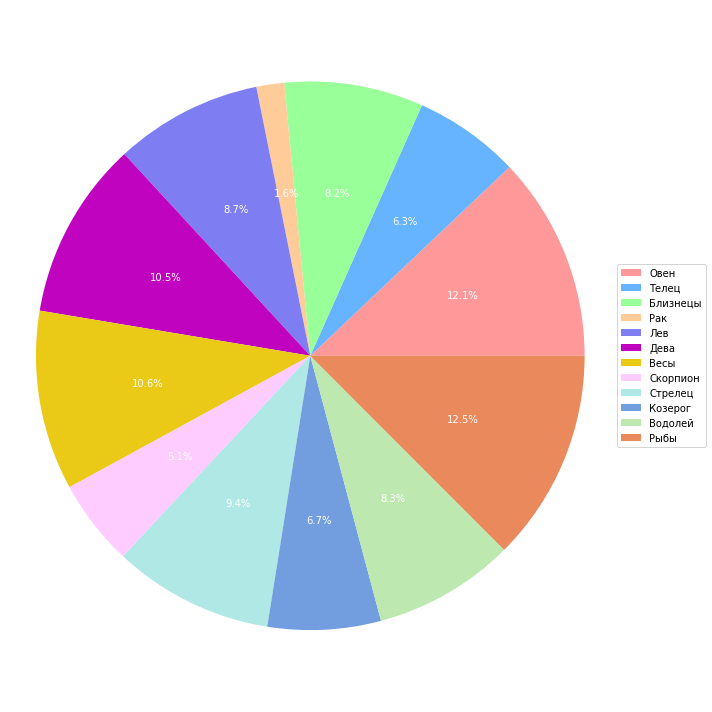

In [88]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
def func(pct):
    absolute = int(np.round(pct*100))
    return "{:.1f}%".format(pct, absolute)

labels = ['Овен', 'Телец', 'Близнецы', 'Рак', 'Лев', 'Дева',
          'Весы', 'Скорпион', 'Стрелец', 'Козерог', 'Водолей', 'Рыбы']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',
          '#7e7ef2', '#bf03bf', '#ebc917', '#ffccff',
          '#afe8e5', '#729edf', '#bde8af', '#e9895c']
wedges, texts, autotexts = ax.pie(grouped_data.values, colors = colors, autopct = lambda pct: func(pct),
                                  textprops=dict(color="w"))


plt.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

Овны и Рыбы на рассхват, а вот Ракам не повезло :(

Bonus: какой знак зодиака чаще всего отправляют на пересдачу?

In [ ]:
grouped_data = data_frame.groupby(by = ['zodiac_sign']).apply(lambda x: x['failed_exams'].value_counts(normalize = True)['Не пересдавал(а)'])
grouped_data = grouped_data[['Овен', 'Телец', 'Близнецы',
                              'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]
print(grouped_data)

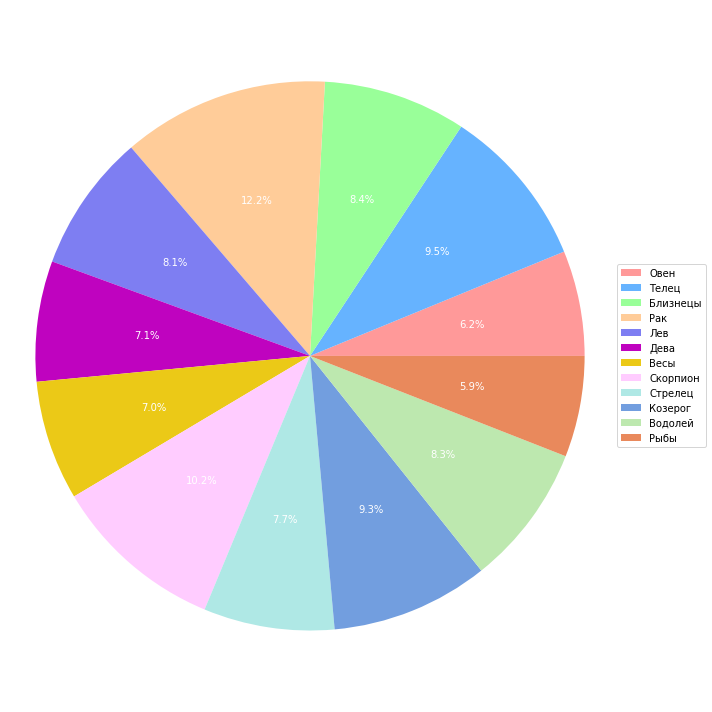

In [89]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
def func(pct):
    absolute = int(np.round(pct*100))
    return "{:.1f}%".format(pct, absolute)

labels = ['Овен', 'Телец', 'Близнецы', 'Рак', 'Лев', 'Дева',
          'Весы', 'Скорпион', 'Стрелец', 'Козерог', 'Водолей', 'Рыбы']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',
          '#7e7ef2', '#bf03bf', '#ebc917', '#ffccff',
          '#afe8e5', '#729edf', '#bde8af', '#e9895c']
wedges, texts, autotexts = ax.pie(1 - grouped_data.values, colors = colors, autopct = lambda pct: func(pct),
                                  textprops=dict(color="w"))


plt.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

Удивительно, но чаще всего валят Раков... 

Этот анализ прововодился в шутку, хотя некоторые интересные закономерности были выявлены!